# Projeto 3 - Previsão de Empréstimos - O cliente é um bom pagador?
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img13.png?raw=true" width="400" height="100"/>

A empresa deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento do formulário de inscrição online.

Esses detalhes são gênero, estado civil, educação, número de dependentes, renda, valor do empréstimo, histórico de crédito e outros.

Dadas as informações, temos que prever se eles pagarão o empréstimo ou não.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [19]:
df=pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Ver o balanceamento da base de dados
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img2.png?raw=true" width="500" height="100"/>

In [20]:
total = df.groupby('Loan_Status').agg(n = ('Loan_Status','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [21]:
total

,Loan_Status,n,perc
0,N,192,31.270358
1,Y,422,68.729642


## Ver se tem valores fora do padrão
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img3.png?raw=true" width="300" height="100"/>

<AxesSubplot:>

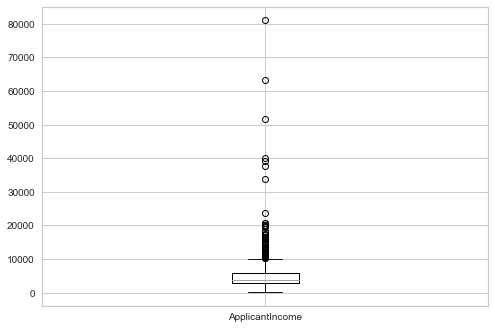

In [22]:
df[['ApplicantIncome']].boxplot()

## Separar em target e feature

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img12.png?raw=true" width="300" height="100"/>

In [23]:
X = df.drop(columns = ['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

## Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Tratar Valor Vazio

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img6.png?raw=true" width="400" height="150"/>

In [25]:
pd.isna(X_train).sum().to_frame("Valor Vazio")

,Valor Vazio
Gender,11
Married,1
Dependents,11
Education,0
Self_Employed,17
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,15
Loan_Amount_Term,11
Credit_History,31


## Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img5.png?raw=true" width="350" height="100"/>

In [26]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan))

## Tratar variáveis categóricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img7.png?raw=true" width="600" height="100"/>

In [27]:
categorical_transformer = make_pipeline(SimpleImputer(strategy='constant', missing_values=np.nan),
                                        OneHotEncoder(handle_unknown='ignore')
                                       )

In [28]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['ApplicantIncome',
                               'CoapplicantIncome',
                               'LoanAmount',
                               'Loan_Amount_Term',
                               'Credit_History']),
        (categorical_transformer,['Gender',
                                  'Married',
                                  'Dependents',
                                  'Education',
                                  'Self_Employed',
                                  'Property_Area'] ))

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img8.png?raw=true" width="250" height="80"/>

In [29]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000)).fit(X_train, y_train)
LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis()).fit(X_train, y_train)
CART = make_pipeline(preprocessor,DecisionTreeClassifier()).fit(X_train, y_train)
KNN = make_pipeline(preprocessor,KNeighborsClassifier()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor,SVC(probability=True)).fit(X_train,y_train) 
RF = make_pipeline(preprocessor,RandomForestClassifier()).fit(X_train,y_train) 

# Acurácia do Treino

In [30]:
print("Acurácia treino LR:", LR.score(X_train,y_train), "\n")
print("Acurácia treino LDA:", LDA.score(X_train,y_train), "\n")
print("Acurácia treino CART:", CART.score(X_train,y_train), "\n")
print("Acurácia treino KNN:", KNN.score(X_train,y_train), "\n")
print("Acurácia treino SVM:", SVM.score(X_train,y_train), "\n")
print("Acurácia treino RF:", SVM.score(X_train,y_train), "\n")

Acurácia treino LR: 0.8175182481751825 

Acurácia treino LDA: 0.8150851581508516 

Acurácia treino CART: 1.0 

Acurácia treino KNN: 0.7469586374695864 

Acurácia treino SVM: 0.7128953771289538 

Acurácia treino RF: 0.7128953771289538 



## Matriz de confusão + Métricas

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img14.png?raw=true" width="350" height="100"/>

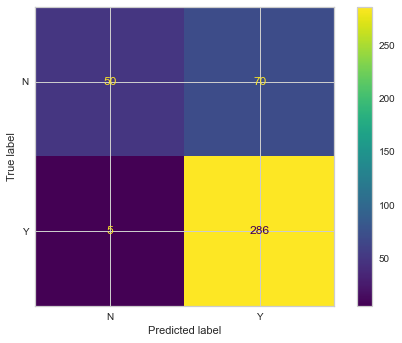

In [31]:
ConfusionMatrixDisplay.from_estimator(LR, X_train,y_train)
plt.show()

In [32]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          LDA.score(X_train,y_train),
                          CART.score(X_train,y_train),
                          KNN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 'N'),
                          precision_score(y_train, LDA.predict(X_train), pos_label = 'N'),
                          precision_score(y_train, CART.predict(X_train), pos_label = 'N'),
                          precision_score(y_train, KNN.predict(X_train), pos_label = 'N'),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 'N'),
                          precision_score(y_train, RF.predict(X_train), pos_label = 'N')],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 'N'),
                          recall_score(y_train, LDA.predict(X_train), pos_label = 'N'),
                          recall_score(y_train, CART.predict(X_train), pos_label = 'N'),
                          recall_score(y_train, KNN.predict(X_train), pos_label = 'N'),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 'N'),
                          recall_score(y_train, RF.predict(X_train), pos_label = 'N')]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','CART','KNN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.817518,0.909091,1.000000
LDA,0.815085,0.907407,0.408333
CART,1.000000,1.000000,1.000000
KNN,0.746959,0.642857,0.300000
SVM,0.712895,1.000000,0.016667
RF,1.000000,1.000000,1.000000


## Curva ROC
<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img15.png?raw=true" width="350" height="200"/>

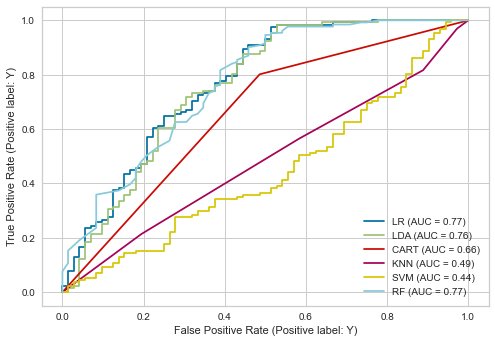

In [33]:
RocCurveDisplay.from_estimator(LR, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LR')
RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LDA')
RocCurveDisplay.from_estimator(CART, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'CART')
RocCurveDisplay.from_estimator(KNN, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'KNN')
RocCurveDisplay.from_estimator(SVM, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'SVM')
RocCurveDisplay.from_estimator(RF, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'RF')

plt.show()

## Encapsular o modelo e Salvar

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img9.png?raw=true" width="200" height="80"/>

In [34]:
pickle.dump(LR, open('Modelo_Emprestimo.sav', 'wb'))

## Abrir modelo salvo

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img10.png?raw=true" width="300" height="100"/>

In [35]:
loaded_model = pickle.load(open('Modelo_Emprestimo.sav', 'rb'))

## Testar agora pro teste. Ver se houve overfitting

<img src="https://github.com/fgiordanelli/Projeto1/blob/main/imagens/img11.png?raw=true" width="150" height="80"/>

In [36]:
print("Acurácia teste LR:", loaded_model.score(X_test, y_test))
print("Precision teste LR:", precision_score(y_test, loaded_model.predict(X_test), pos_label = 'N'))
print("Recall teste LR:", recall_score(y_test, loaded_model.predict(X_test), pos_label = 'N'))

Acurácia teste LR: 0.7980295566502463
Precision teste LR: 0.9428571428571428
Recall teste LR: 0.4583333333333333
